# **Shaghayegh Bagheri**
# 🏅 Olympic Medals Analysis (1900–2024)



# Loading libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [51]:
df = pd.read_csv("olympics_dataset.csv")
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


# Data cleaning

## Categorical Variable Encoding

In [52]:
# Encoding the Sex column into numeric values (0,1)
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})

In [53]:
# Encoding the Medals column into numeric values (0,1,2,3)
df["Medal"] = df["Medal"].map({"No medal": 0, "Gold": 1 , "Silver": 2, "Bronze": 3})

In [54]:
df

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,1,A Lamusi,0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,2,Gunnar Aaby,0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,3,Edgar Aabye,0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,26,Cornelia (-strannood),1,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,0
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,1,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,0
252561,9460001,Emanuela Liuzzi,1,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,0
252562,1972077,Isayah Boers,0,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,1
252563,1899865,Kevin Staut,0,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,3


## Deleting the Unnecessary Data

In [55]:
print(df.columns)

Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')


In [56]:
df.drop(columns=["player_id"],inplace=True)

In [57]:
df.drop(columns=["Season"], inplace=True)

In [58]:
df.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,0
1,A Lamusi,0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,0
2,Gunnar Aaby,0,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,0
3,Edgar Aabye,0,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,Cornelia (-strannood),1,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,0


The "season" column only contains the summer season, so it does not provide any new or useful information. Therefore, I removed it.

In [59]:
df = df[df['Medal'] != 0]

print(df.shape)
df

(38818, 9)


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
3,Edgar Aabye,0,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
12,Arvo Aaltonen,0,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,3
13,Arvo Aaltonen,0,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,3
15,Paavo Aaltonen,0,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Individual All-Around,3
16,Paavo Aaltonen,0,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,1
...,...,...,...,...,...,...,...,...,...
252551,Quincy Wilson,0,United States,USA,2024,Paris,Athletics,4 x 400m Relay Mixed,2
252556,van Anne,1,Netherlands,NED,2024,Paris,Athletics,Women's 4 x 400m Relay,2
252562,Isayah Boers,0,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,1
252563,Kevin Staut,0,France,FRA,2024,Paris,Equestrian,Jumping Team,3


Since we want to analyze the data of Olympic winners, we will remove the individuals who did not win any medals from the dataset.

**Now we have a dataset in which all the columns are important, and the variables Gender and Medal are also encoded.**

## Missing values

In [60]:
# Checking for missing values in dataset
df.isnull().sum()

Name     0
Sex      0
Team     0
NOC      0
Year     0
City     0
Sport    0
Event    0
Medal    0
dtype: int64

We have No missing value in this dataset.

# Descriptive Analysis

## Total number of medals

In [61]:
total_medals = df.shape[0]
print("total number of medals: ", total_medals)

total number of medals:  38818


## Distribution of medals among countries



Top 5 countries based on the number of medals:
Team
United States    5305
Soviet Union     2061
Great Britain    1895
Germany          1876
France           1736
Name: count, dtype: int64


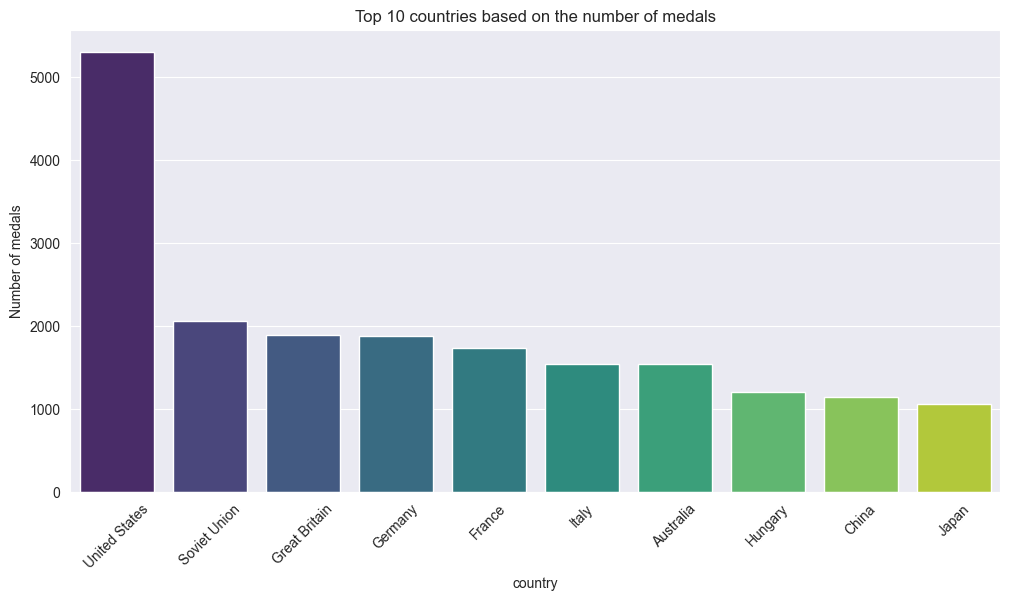

In [62]:
medals_by_country = df['Team'].value_counts()
print("\nTop 5 countries based on the number of medals:")
print(medals_by_country.head())

# barchart plot of countries
plt.figure(figsize=(12,6))
sns.barplot(x=medals_by_country.head(10).index,
            y=medals_by_country.head(10).values,
            hue=medals_by_country.head(10).index,
            dodge=False,
            legend=False,
            palette='viridis')
plt.title("Top 10 countries based on the number of medals")
plt.ylabel("Number of medals")
plt.xlabel("country")
plt.xticks(rotation=45)
plt.show()

This chart shows the top 10 countries that have won medals in the Olympics. Based on this chart, we can see that the country with the most Olympic medals in the past 100 years is the USA, with 5,305 medals.

The Soviet Union, with 2,061 medals, and Great Britain, with 1,895 medals, rank second and third, respectively.


## Distribution of medals by gender



Number of medals by gender: 
Sex
0    27021
1    11797
Name: count, dtype: int64


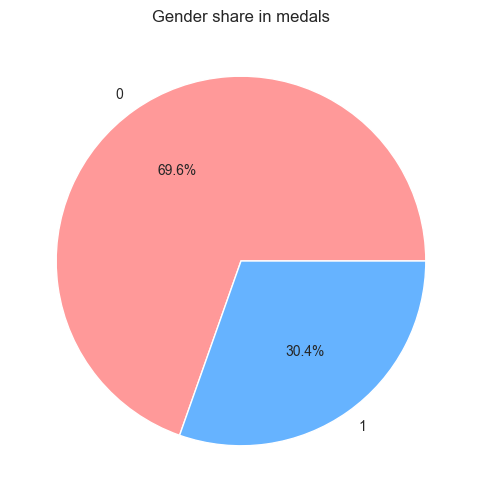

In [63]:
medals_by_sex = df['Sex'].value_counts()
print("\nNumber of medals by gender: ")
print(medals_by_sex)

# Pie chart plot by gender
plt.figure(figsize=(6,6))
plt.pie(medals_by_sex, labels=medals_by_sex.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Gender share in medals")
plt.show()


As shown in the pie chart, approximately 70% of Olympic winners were men, while around 30% were women.


## Number of sports and events



number of sports: 71
number of events: 1030


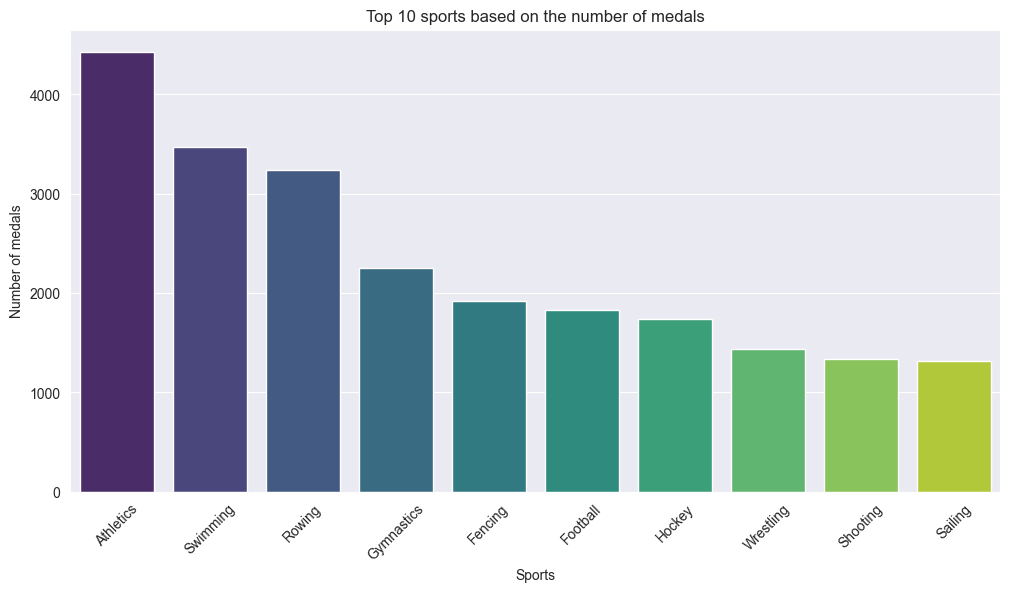

In [64]:
num_sports = df['Sport'].nunique()
num_events = df['Event'].nunique()
print(f"\nnumber of sports: {num_sports}")
print(f"number of events: {num_events}")

# Bar chart of sports with the highest number of medals

medals_by_sport = df['Sport'].value_counts()
plt.figure(figsize=(12,6))

sns.barplot(x=medals_by_sport.head(10).index,
            y=medals_by_sport.head(10).values,
            hue=medals_by_sport.head(10).index,
            dodge=False,
            legend=False,
            palette='viridis')
plt.title("Top 10 sports based on the number of medals")
plt.ylabel("Number of medals")
plt.xlabel("Sports")
plt.xticks(rotation=45)
plt.show()

From this plot, we can see that athletes in athletics have won over 4,000 medals in the past hundred years, securing the first place among all sports. Swimming and rowing rank second and third in this plot, respectively.


# Trend Analysis

## Total number of medals each year


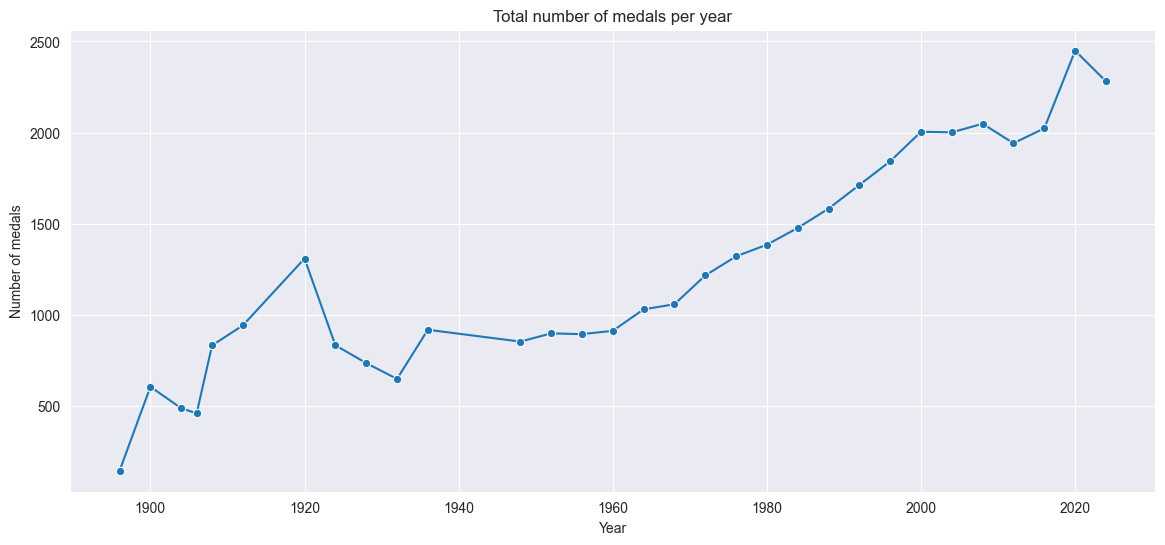

In [65]:
medals_per_year = df.groupby('Year').size()
plt.figure(figsize=(14,6))
sns.lineplot(x=medals_per_year.index, y=medals_per_year.values, marker='o')
plt.title("Total number of medals per year")
plt.xlabel("Year")
plt.ylabel("Number of medals")
plt.grid(True)
plt.show()

The trend in the plot is upward, meaning the number of medals has been increasing year by year. This can be attributed to several reasons: an increase in the number of events and sports, a rise in the number of participating countries and athletes, and the global expansion of the Olympics.


## Trend of male and female participation in medals


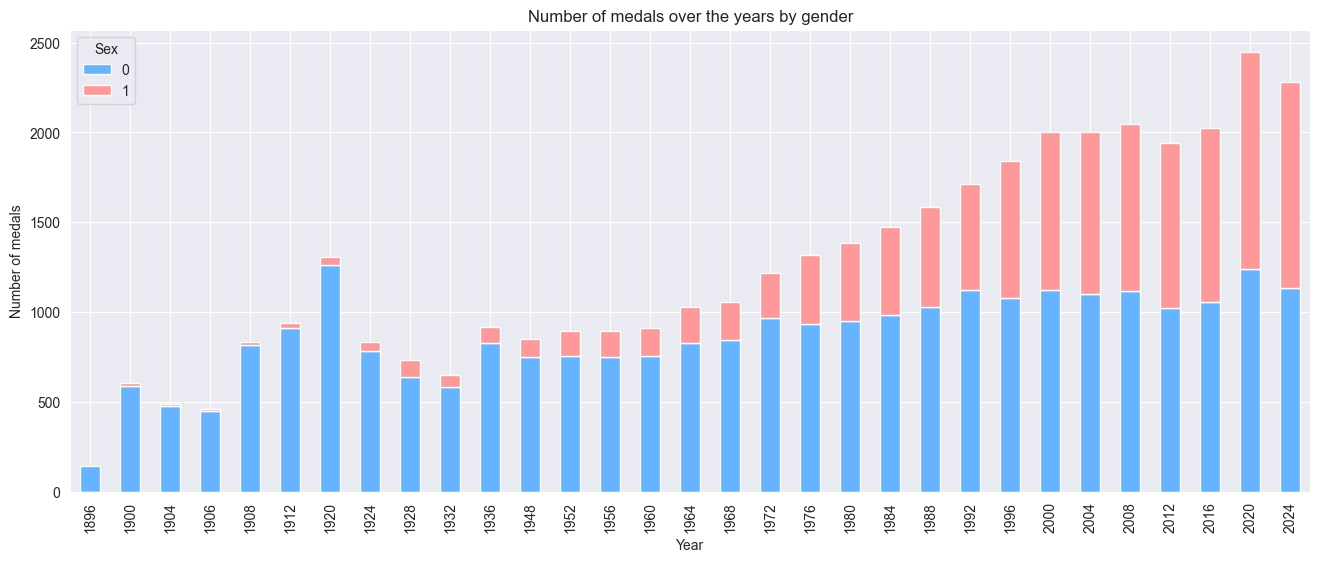

In [66]:
medals_by_year_sex = df.groupby(['Year', 'Sex']).size().unstack(fill_value=0)

# stacked bar
medals_by_year_sex.plot(kind='bar', stacked=True, figsize=(16,6), color=['#66b3ff','#ff9999'])
plt.title("Number of medals over the years by gender")
plt.xlabel("Year")
plt.ylabel("Number of medals")
plt.legend(title='Sex')
plt.show()

The chart shows the historical trend of medals and the growth of female participation.

Men initially held the majority, but over time, the share of women has increased, reaching near parity in recent Olympics.

The overall increase in medals is mostly due to the expansion of sports and the number of athletes, rather than necessarily better performance by one gender.


## Emergence of new countries over the decades


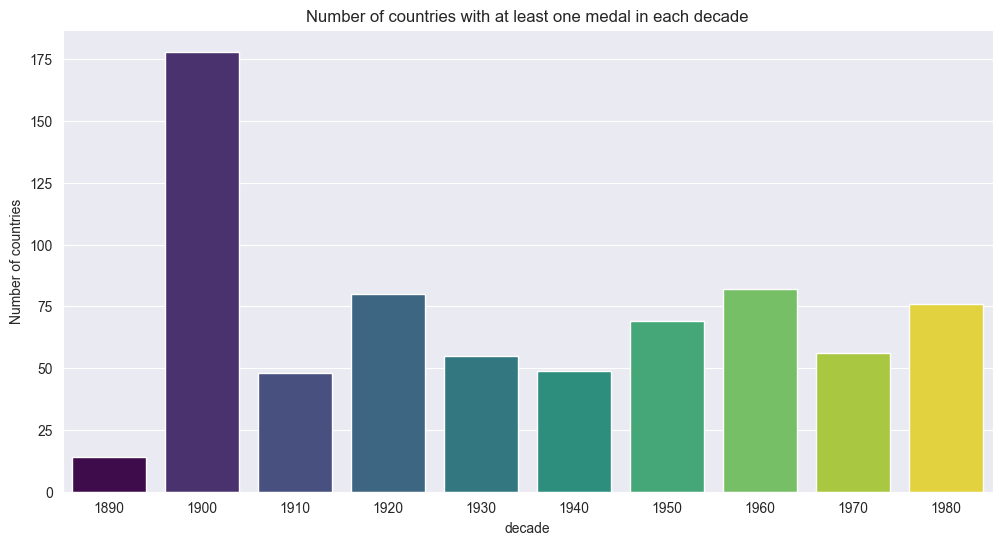

In [76]:
pd.options.mode.chained_assignment = None

df['Decade'] = (df['Year'] // 10) * 10
countries_per_decade = df.groupby('Decade')['Team'].nunique()

plt.figure(figsize=(12,6))
sns.barplot(x=countries_per_decade.head(10).index,
            y=countries_per_decade.head(10).values,
            hue=countries_per_decade.head(10).index,
            dodge=False,
            legend=False,
            palette='viridis')

plt.title("Number of countries with at least one medal in each decade")
plt.xlabel("decade")
plt.ylabel("Number of countries")
plt.show()

The Olympics has transformed from a small event with a limited number of countries into a global event with wide international participation.

The overall trend has been toward expansion and globalization of the Olympics, although there have been fluctuations in some decades.


## Country-level Analysis

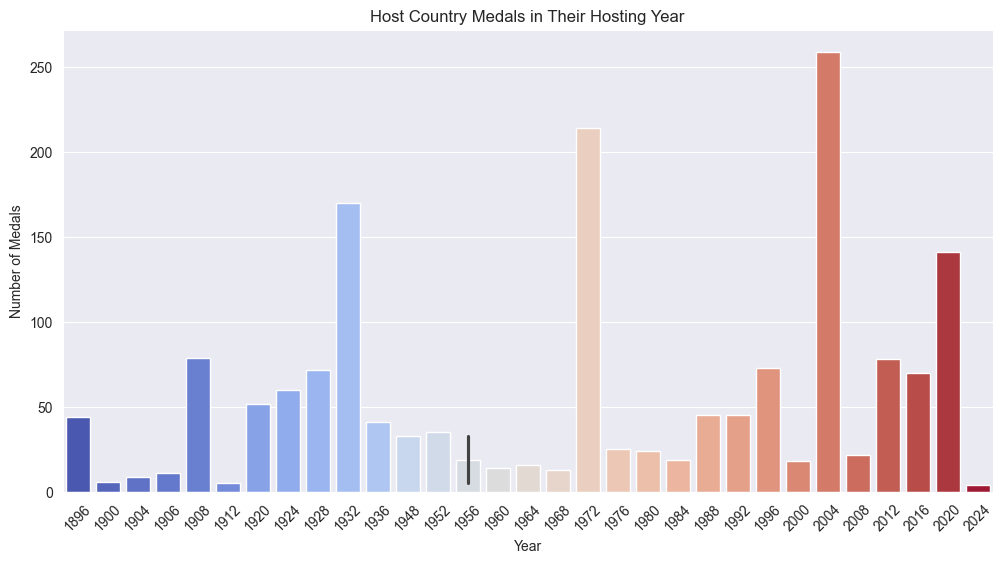

In [68]:
host_effect = df.groupby(['Year','City','Team'])['Medal'].count().reset_index()

# Identifying the host country for each year
hosts = df[['Year','City','Team']].drop_duplicates(subset=['Year','City'])[['Year','City','Team']]

# Join for comparison
host_medals = host_effect.merge(hosts, on=['Year','City','Team'])

plt.figure(figsize=(12,6))

sns.barplot(
    x=host_medals['Year'],
    y=host_medals['Medal'],
    hue=host_medals['Year'],
    palette='coolwarm',
    legend=False
)

plt.title("Host Country Medals in Their Hosting Year")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.show()

The number of medals has fluctuated significantly over time. In some years (such as the early 20th century and the late 20th century), the number of medals was notably high, while in others (like the 1940s and 1950s) it was lower.

(The color variation is due to the use of the coolwarm palette and does not represent differences between years; it is purely a visual effect.)


## Sport Analysis

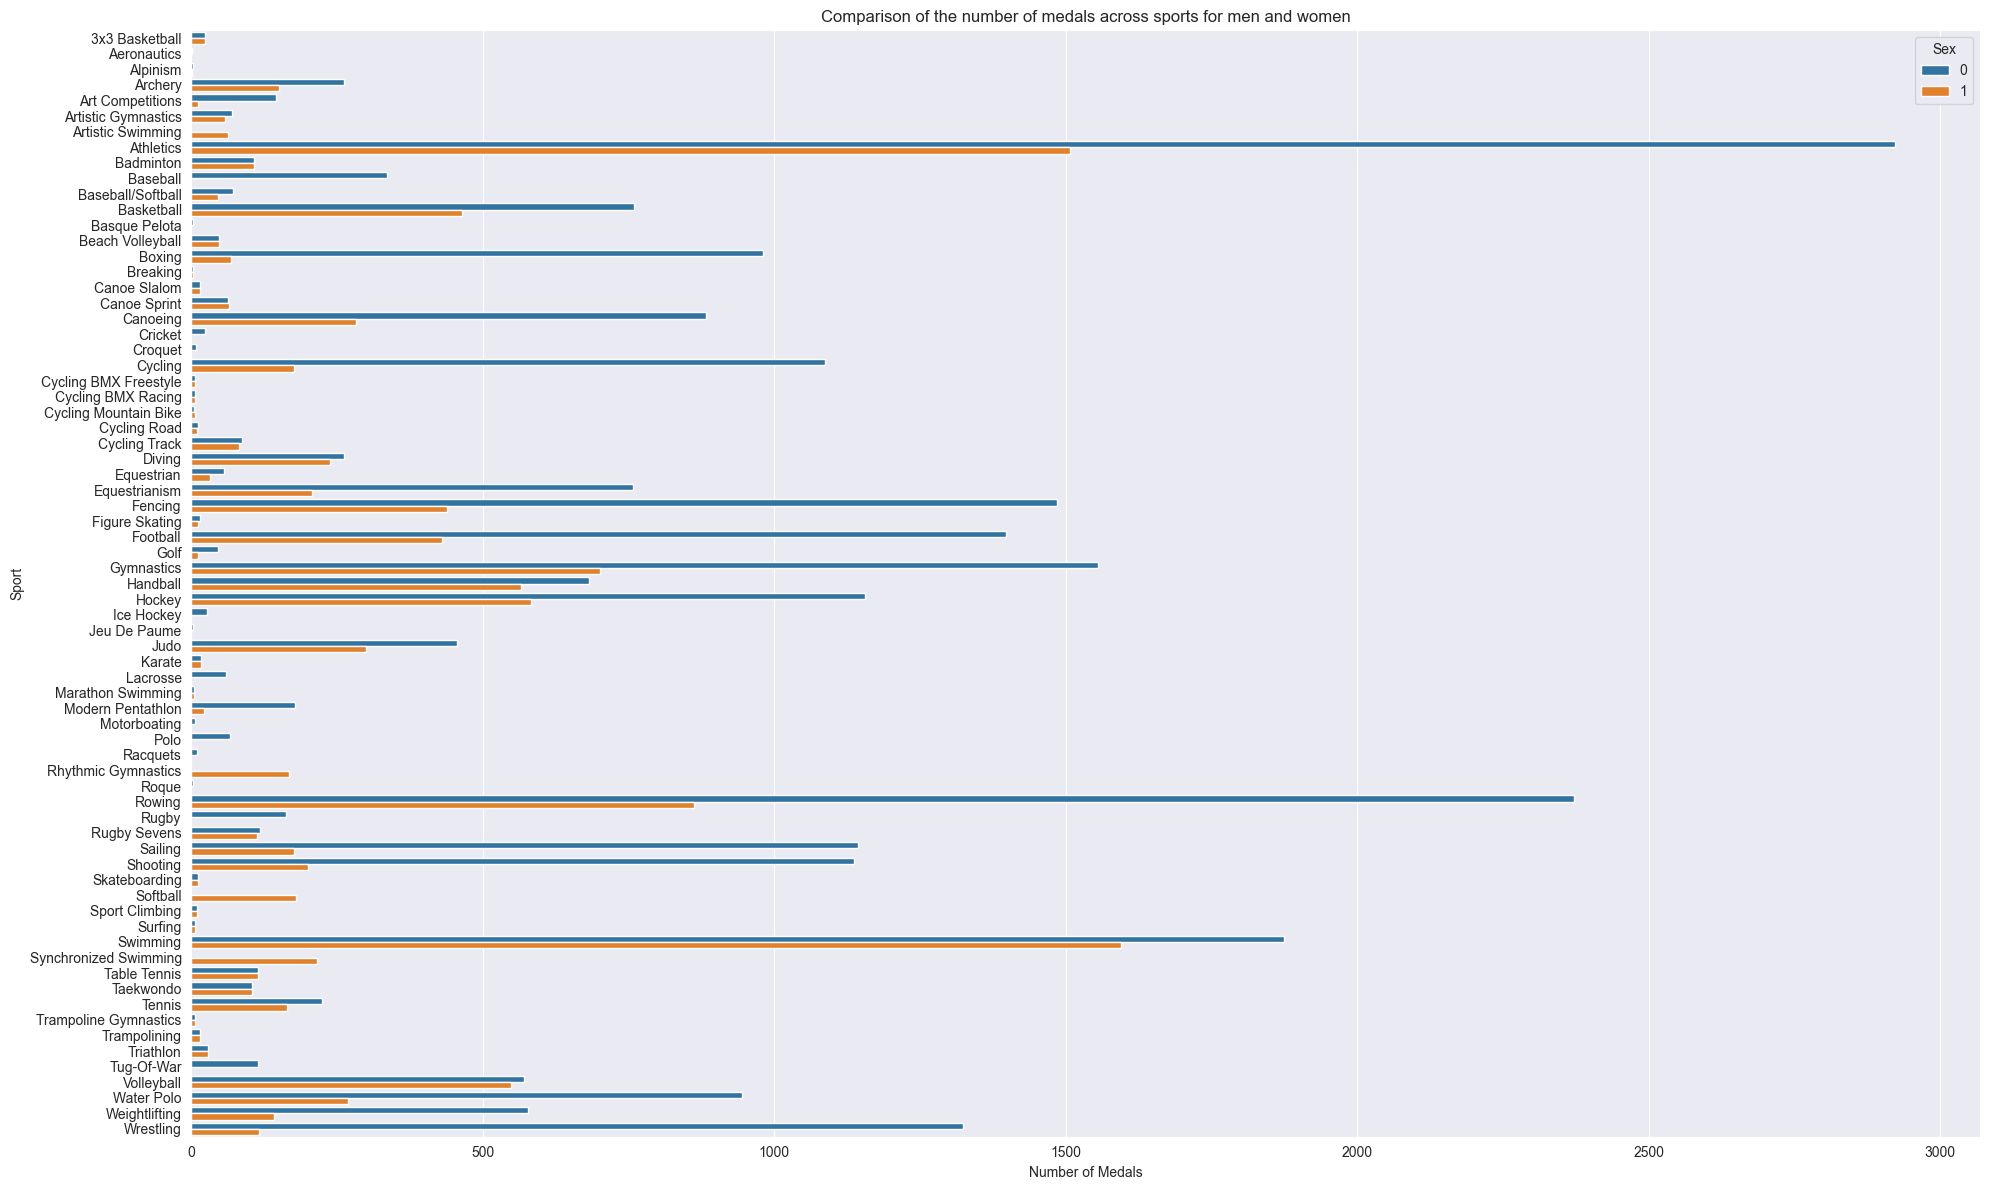

In [69]:
medal_count_sport_gender = df.groupby(['Sport', 'Sex'])['Medal'].count().reset_index()
medal_count_sport_gender.rename(columns={'Medal':'Medal_Count'}, inplace=True)

# Comparative chart of medals by sport and gender

plt.figure(figsize=(20,12))
sns.barplot(data=medal_count_sport_gender, x='Medal_Count', y='Sport', hue='Sex', dodge=True )
plt.title('Comparison of the number of medals across sports for men and women')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


**Plot analysis:**

**In this plot, blue represents men and orange represents women.**

* We know that athletics, swimming, rowing, and gymnastics were among the top five sports in terms of medals won.
* In this plot, in athletics, roughly half of the winners were men and half were women.
* In swimming, women won about 300 fewer medals than men.
* In rowing, the number of women winners was about one-third of the men.
* In gymnastics, roughly half of the medal winners were men and half were women.
* There are also sports like baseball that overall did not win many Olympic medals, and in those, all of the medal winners were men.
* A sport like wrestling, which has a large number of medals, also has a high percentage of male winners.
* In synchronized swimming and Rhythmic Gymnastics, all the medal winners are women.
* In volleyball, the number of male and female winners is roughly equal.



# Athlete-level Analysis

## The athlete with the most medals

Top 10 Medalists:
                         Name       Sport  Medal
18013              Michael Ii    Swimming     28
15103         Larysa (diriy-)  Gymnastics     18
19265       Nikolay Andrianov  Gymnastics     15
6078      Edoardo Mangiarotti     Fencing     13
3237           Borys Shakhlin  Gymnastics     13
9166          Gustaf Carlberg    Shooting     13
24281             Takashi Ono  Gymnastics     13
22458             Ryan Lochte    Swimming     12
22853              Sawao Kato  Gymnastics     12
3065   Birgit Fischer-schmidt    Canoeing     12


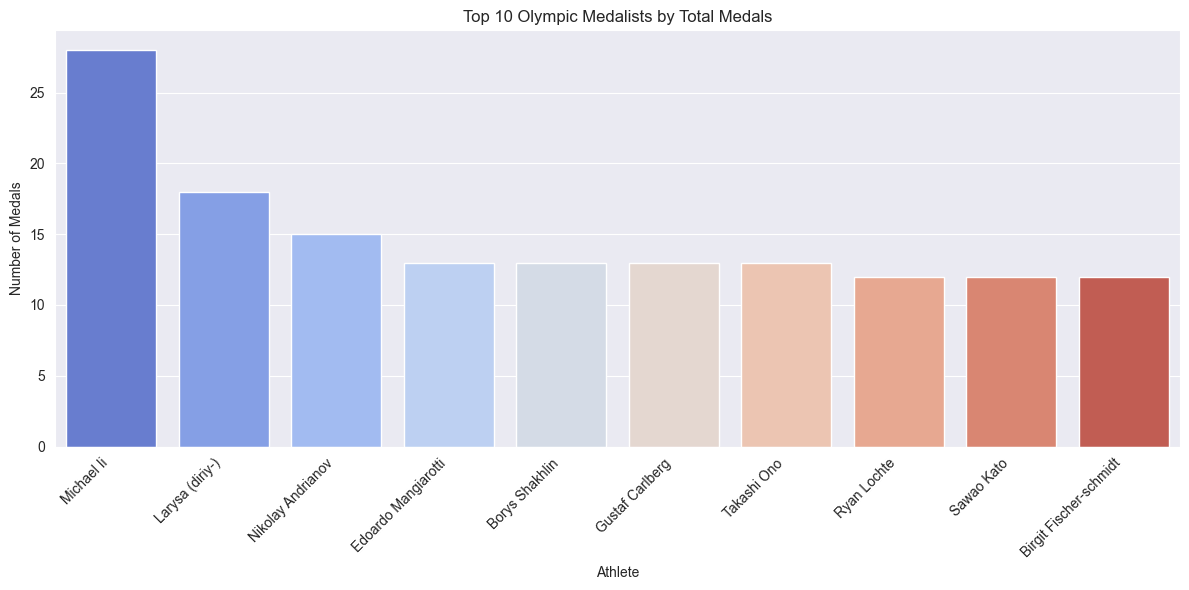

In [70]:
# the total number of medals for each athlete

medal_counts = df.groupby(['Name', 'Sport'])['Medal'].count().reset_index()
medal_counts = medal_counts.sort_values(by='Medal', ascending=False)

# top 10
top_10 = medal_counts.head(10)
print("Top 10 Medalists:")
print(top_10[['Name', 'Sport', 'Medal']])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Name', y='Medal', palette='coolwarm', hue='Name', legend=False)
plt.title('Top 10 Olympic Medalists by Total Medals')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')  # چرخش نام‌ها برای خوانایی بهتر
plt.tight_layout()
plt.show()

**As we can see in the plot and the printed DataFrame, the person with the most medals in the last 100 years of the Olympics is Michael li, with 28 medals in swimming.**

In this output, we can see that among the top ten athletes with the most medals, five are in gymnastics, two are in swimming, and one each in fencing, shooting, and canoeing.

## Gold medal count analysis

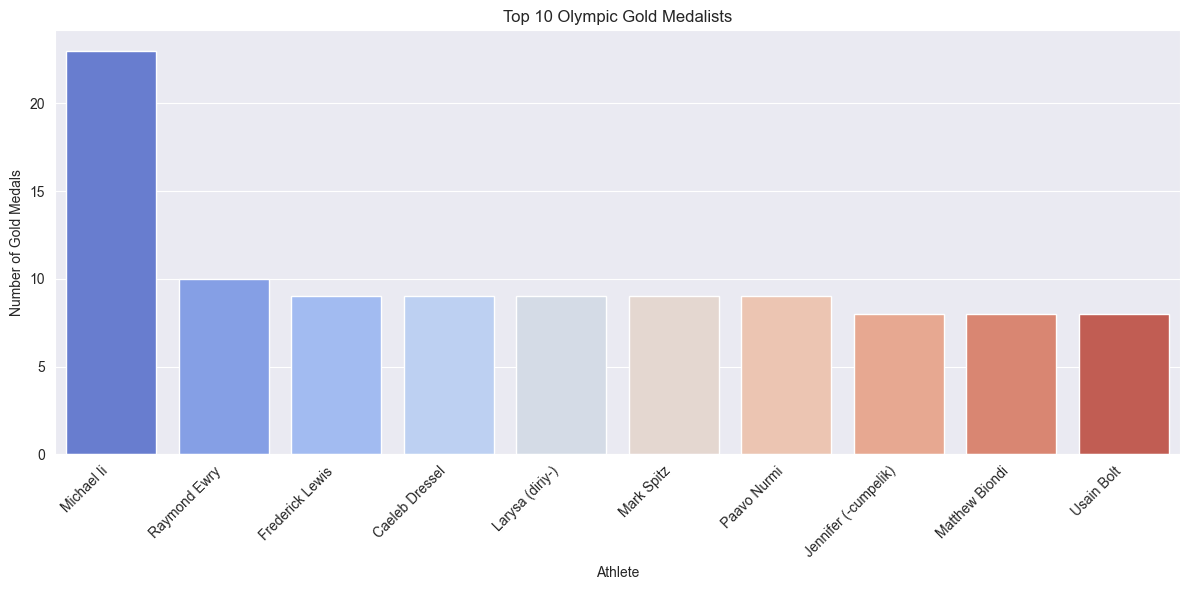

Top 10 Gold Medalists with Sport:
                      Name       Sport           Team  Gold Count
6561            Michael Ii    Swimming  United States          23
7764          Raymond Ewry   Athletics  United States          10
2883       Frederick Lewis   Athletics  United States           9
1252        Caeleb Dressel    Swimming  United States           9
5470       Larysa (diriy-)  Gymnastics   Soviet Union           9
6265            Mark Spitz    Swimming  United States           9
7313           Paavo Nurmi   Athletics        Finland           9
4372  Jennifer (-cumpelik)    Swimming  United States           8
6380        Matthew Biondi    Swimming  United States           8
9251            Usain Bolt   Athletics        Jamaica           8


In [71]:
gold_medals = df[df['Medal'] == 1]

# the number of gold medals for each athlete (among top 10 medal winners)
gold_counts = gold_medals.groupby(['Name', 'Sport',"Team"])['Medal'].count().reset_index(name='Gold Count')

top_10_gold = gold_counts.sort_values(by='Gold Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_gold, x='Name', y='Gold Count', palette='coolwarm', hue='Name', legend=False)
plt.title('Top 10 Olympic Gold Medalists')
plt.xlabel('Athlete')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 10 Gold Medalists with Sport:")
print(top_10_gold)

In this plot, we can see that among the top ten medal winners, the first place is still Michael Phelps, who has won the highest number of gold medals by a large margin. The other nine athletes have won a roughly similar number of gold medals, all under ten, while Michael Phelps has won over 20 gold medals.

## Analysis of gold medals by gender

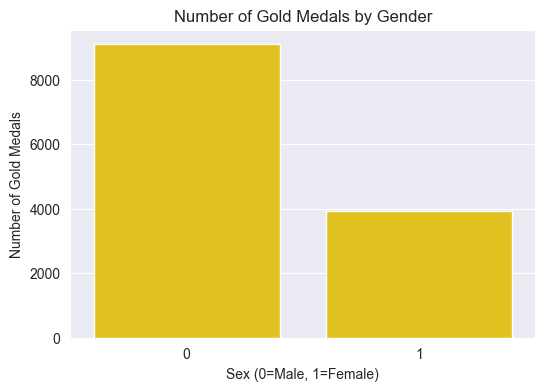

In [72]:
# Gold medal count by gender
gold_by_sex = gold_medals['Sex'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=gold_by_sex.index, y=gold_by_sex.values, color='gold')

plt.title("Number of Gold Medals by Gender")
plt.xlabel("Sex (0=Male, 1=Female)")
plt.ylabel("Number of Gold Medals")
plt.show()

Men have won approximately 60–70% of the gold medals, while women have won about 30–40%.

Trend: These data indicate a numerical dominance of men in winning gold medals, which may be related to historical factors (such as lower female participation in the early Olympics), the number of male-dominated sports, or differences in opportunities.


## Country-wise sport specialization

In [73]:
# Country- and sport-wise grouping
sport_country = df.groupby(['Sport','Team'])['Medal'].count().reset_index()

# Top medal-winning country for each sport
top_country_by_sport = sport_country.loc[sport_country.groupby('Sport')['Medal'].idxmax()]

print(top_country_by_sport.sort_values(by='Medal', ascending=False).head(15))


           Sport           Team  Medal
1459    Swimming  United States   1194
197    Athletics  United States   1181
259   Basketball  United States    389
662      Fencing          Italy    387
1078      Rowing  United States    346
827       Hockey    Netherlands    308
781   Gymnastics   Soviet Union    288
1373    Shooting  United States    207
1687  Water Polo        Hungary    198
695     Football         Brazil    180
490      Cycling  Great Britain    169
433     Canoeing        Germany    159
1677  Volleyball  United States    158
589       Diving  United States    147
1843   Wrestling  United States    144


* high-medal sports: Swimming and athletics, with over 1,000 medals each, reflect the large number of events and participants in these sports.
* Team sports: Basketball (389), hockey (308), volleyball (158), and football (180) indicate that successful countries in team sports generally win fewer medals compared to individual sports.
* Specialized sports: Fencing (Italy), water polo (Hungary), and rowing (Germany) demonstrate the particular focus of some countries on specific sports.
* U.S. dominance: The frequent presence of the United States at the top of the table (7 out of 14) reflects massive investment in sports, infrastructure, and a high number of athletes.
* Country specialization: Other countries (such as Italy, the Netherlands, Hungary) stand out in one or two specific sports, which may be related to their sports culture or history.
* Medal drop at the lower end: From 147 (diving) to 1,181 (athletics) indicates that some sports are less developed or have fewer events

## Top medal-winning sports for women

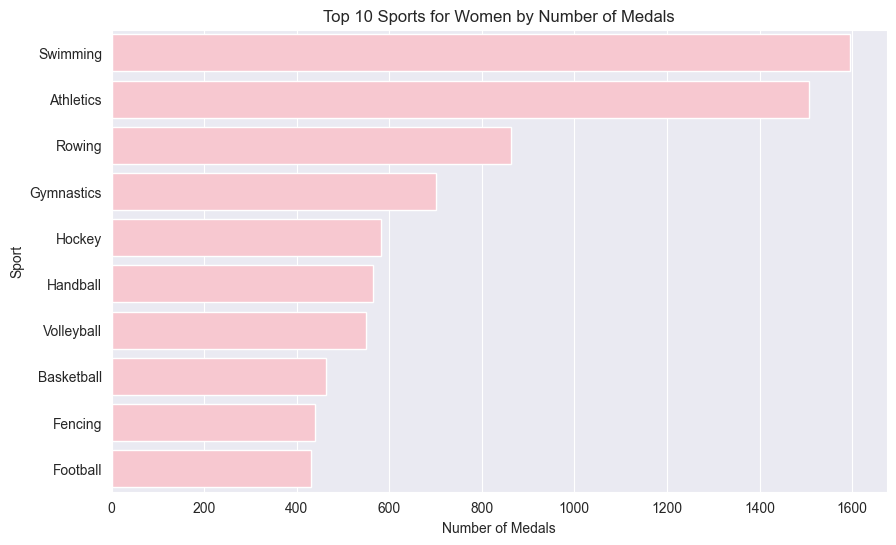

In [74]:
female_sport = df[df['Sex']==1]['Sport'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=female_sport.values, y=female_sport.index, color='pink')
plt.title("Top 10 Sports for Women by Number of Medals")
plt.xlabel("Number of Medals")
plt.ylabel("Sport")
plt.show()

* Total medals: The estimated total number of medals in these ten sports for women is around 6,000 to 7,000, reflecting the progress of women in the Olympics (women had limited opportunities until 1920).
* Downward trend: The number of medals gradually decreases from top to bottom, with a large gap between the first two sports (swimming and athletics) and the rest. These two sports account for over 50% of the total medals in the list.
* Women's progress: This list shows that women have been highly successful in aquatic sports (swimming, rowing) and athletics, which may be related to better access to training facilities and financial support. For example, the United States dominates swimming with athletes.
* Team vs. individual sports: Individual sports (swimming, athletics, gymnastics) have the highest number of medals, as they offer more events.

### Conclusion:

* A comprehensive analysis of Olympic data over the past 100 years highlights the remarkable transformation of the event from a small competition into a global phenomenon, accompanied by an increase in the number of sports, participants, and countries.

* The United States, with 5,305 medals and leading sports such as swimming and athletics, has emerged as a top performer, while the progress of women—from around 30% in the early 20th century to near equality in recent Olympics—reflects social changes and more equal opportunities.

* However, the historical dominance of men (60–70% of medals, especially in sports like wrestling) and women's success in aquatic and individual sports (such as swimming, with about 300 fewer medals than men) indicate the influence of cultural and structural factors.

* This upward trend, along with decade-specific fluctuations (such as the decline in the 1940s), emphasizes that global expansion and improved performance, rather than gender superiority, have been the main drivers of increasing medal counts, with figures like Michael Phelps (28 medals) symbolizing this evolution.